100 100

Jul 07 20:20:45 NodeManager::prepare_nodes [Info]: 
    Preparing 9204 nodes for simulation.

Jul 07 20:20:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 9204
    Simulation time (ms): 1000
    Number of OpenMP threads: 4
    Not using MPI

[ 100% ] Model time: 1000.0 ms, Real-time factor: 15.0224

Jul 07 20:21:02 SimulationManager::run [Info]: 
    Simulation finished.
150 150

Jul 07 20:21:06 NodeManager::prepare_nodes [Info]: 
    Preparing 11004 nodes for simulation.

Jul 07 20:21:07 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 11004
    Simulation time (ms): 1000
    Number of OpenMP threads: 4
    Not using MPI

[ 100% ] Model time: 1000.0 ms, Real-time factor: 41.3397

Jul 07 20:21:49 SimulationManager::run [Info]: 
    Simulation finished.


NameError: name 'rate' is not defined

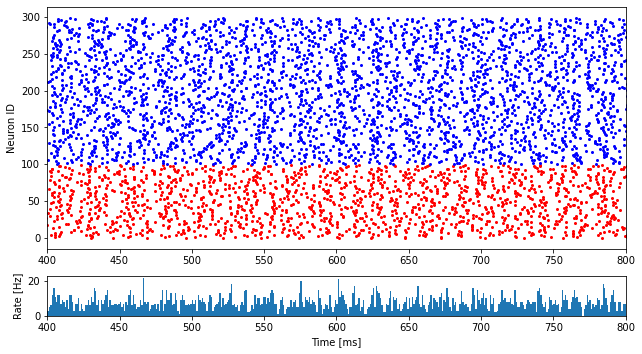

In [3]:
# Import libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import nest
import itertools

from functions import Network, raster, rate

neuron_params = {"C_m":     1.0,
                 "tau_m":   20.,
                 "t_ref":   2.0,
                 "E_L":     0.0,
                 "V_reset": 0.0,
                 "V_m":     0.0,
                 "V_th":    20.
                 }

params = {
    'num_neurons': 8000,                # number of neurons in network
    'rho':  0.2,                        # fraction of inhibitory neurons
    'eps':  0.2,                        # probability to establish a connections
    'g':    5,                          # excitation-inhibition balance
    'eta':  5,                          # relative external rate
    'J':    0.1,                        # postsynaptic amplitude in mV
    'neuron_params': neuron_params,     # single neuron parameters
    'n_rec_ex':  600,                   # excitatory neurons to be recorded from
    'n_rec_in':  150,                   # inhibitory neurons to be recorded from
    'rec_start': 600.,                  # start point for recording spike trains
    'rec_stop':  800.                   # end points for recording spike trains
    }

nest.ResetKernel()
nest.SetKernelStatus({'local_num_threads': 4})  # Adapt if necessary

nest.print_time = True
#nest.overwrite_files = True

network = Network(**params)
network.create()
network.simulate(1000)
test = network.get_data()
rate(test[0], test[1], params.get('rec_start'), params.get('rec_stop'))

#nu_th = theta / (J * CE * tauMem)
#nu_ex = eta * nu_th

#theta = V_th

nu_th = neuron_params['V_th'] / (params['J'] * network.c_ex * neuron_params['tau_m'])
nu_ex = params['eta'] * nu_th

ratio = nu_ex/nu_th

raster(test[0], test[1], params.get('rec_start'), params.get('rec_stop'))
#nest.raster_plot.from_device(network.spike_recorder_ex)